# Engenharia de Atributos

Nome: Ricardo Coutinho Cordeiro

Professor: Ulisses Brisolara Corrêa


# Feature Engineering with Sklearn - Descrição da Tarefa


Baixe os três conjuntos de dados. Cada um deles possui características de atributos distintas. Utilizando técnicas de engenharia de atributos com sklearn (ou outra ferramenta), selecione a menor quantidade de atributos possível em cada um deles, mas sem remover atributos significativos.

## Download Datasets

In [ ]:
!pip install gdown -qqq

In [ ]:
!gdown https://drive.google.com/uc?id=1q_VpqJ8O8JazQez-N6SYTBb51T4QrpMz
!gdown https://drive.google.com/uc?id=1tFcc2B7UfIzy7q3P49EzVxgetdRnbxfc
!gdown https://drive.google.com/uc?id=13fGg8YT844EN3xLgl5UzW1HOsOIbqYPo

Downloading...
From: https://drive.google.com/uc?id=1q_VpqJ8O8JazQez-N6SYTBb51T4QrpMz
To: /content/ia_fe_dataset1.csv
100% 161k/161k [00:00<00:00, 78.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1tFcc2B7UfIzy7q3P49EzVxgetdRnbxfc
To: /content/ia_fe_dataset2.csv
100% 1.55M/1.55M [00:00<00:00, 141MB/s]
Downloading...
From: https://drive.google.com/uc?id=13fGg8YT844EN3xLgl5UzW1HOsOIbqYPo
To: /content/ia_fe_dataset3.csv
100% 3.08M/3.08M [00:00<00:00, 203MB/s]


In [ ]:
import pandas as pd

df1 = pd.read_csv('/content/ia_fe_dataset1.csv')
df2 = pd.read_csv('/content/ia_fe_dataset2.csv')
df3 = pd.read_csv('/content/ia_fe_dataset3.csv')

print("Primeiro conjunto de dados:")
print(df1.head())

print("\nSegundo conjunto de dados:")
print(df2.head())

print("\nTerceiro conjunto de dados:")
print(df3.head())

Primeiro conjunto de dados:
   feature_1  feature_2  feature_3  feature_4  feature_5  target
0  -0.092542  -1.585122  -1.585122  -0.186425  -0.909699       0
1  -0.152189  -1.589585  -1.589585  -0.207747  -0.320193       1
2  -2.862124  -2.941878  -2.941878  -1.288126   1.690396       1
3   0.458934  -0.414691  -0.414691   0.120419   0.397453       0
4   0.220629  -0.548184  -0.548184   0.023997  -0.287288       0

Segundo conjunto de dados:
   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.192158   0.929224   0.965508  -1.089442   0.475934   2.078171   
1  -0.617306  -0.786169  -0.705417   1.671738   0.680446   3.879542   
2   0.170215  -0.066278  -0.272753  -0.209137   0.324089   1.535735   
3   1.451162   1.655477   1.181069   0.412024  -1.191723   1.007346   
4  -0.454557  -1.179173   0.444844   1.586372   0.441436   5.606994   

   feature_7  feature_8  feature_9  feature_10  ...  feature_42  feature_43  \
0  -1.406010   0.929224   1.602152    1.961511  

# Correlation Selection

## Explanation: https://www.w3schools.com/python/pandas/pandas_correlations.asp
## Reference Guide: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
## Source: https://github.com/pandas-dev/pandas/blob/v2.2.2/pandas/core/frame.py#L10975-L11087


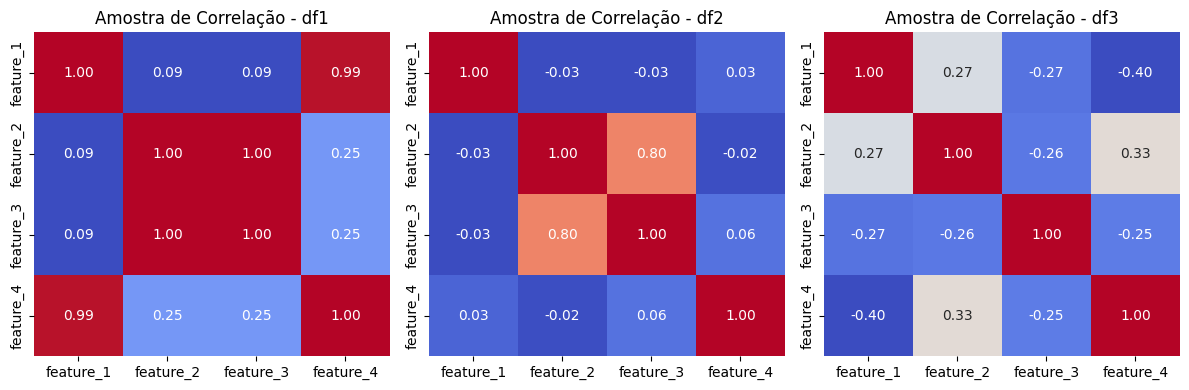

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Amostra das matrizes de correlação para os três conjuntos de dados
correlation_matrix_df1 = df1.corr().iloc[:4, :4]
correlation_matrix_df2 = df2.corr().iloc[:4, :4]
correlation_matrix_df3 = df3.corr().iloc[:4, :4]

# Criar os mapas de calor para cada conjunto de dados
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.heatmap(correlation_matrix_df1, annot=True, cmap="coolwarm", fmt=".2f", cbar=False)
plt.title("Amostra de Correlação - df1")

plt.subplot(1, 3, 2)
sns.heatmap(correlation_matrix_df2, annot=True, cmap="coolwarm", fmt=".2f", cbar=False)
plt.title("Amostra de Correlação - df2")

plt.subplot(1, 3, 3)
sns.heatmap(correlation_matrix_df3, annot=True, cmap="coolwarm", fmt=".2f", cbar=False)
plt.title("Amostra de Correlação - df3")

plt.tight_layout()
plt.show()

Conjunto de Dados 1:

*   Existe uma forte correlação positiva (próxima de 1) entre feature_1 e feature_4;
*   As feature_2 e feature_3 têm correlação positiva perfeita entre si (1), o que sugere que podem ser redundantes ou até mesmo idênticas;
*   A correlação entre feature_1 e feature_2 é muito baixa (0.088525), indicando que elas são praticamente independentes uma da outra.


Conjunto de Dados 2:

*   Não há forte correlação entre as características, todas as correlações são relativamente baixas (próximas de zero), com exceção de uma correlação moderada (0.795003) entre feature_2 e feature_3.

*   Não há forte correlação entre as características, todas as correlações são relativamente baixas (próximas de zero), com exceção de uma correlação moderada (0.795003) entre feature_2 e feature_3.

Conjunto de Dados 3:

*   Há uma correlação negativa moderada entre feature_1 e feature_4 (-0.403924), sugerindo uma relação inversa entre essas características.
*   As outras correlações são próximas de zero, indicando baixa relação linear entre as características.






## Select From Model
Documentation: https://scikit-learn.org/stable/modules/feature_selection.html#select-from-model
Reference guide: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html
Source: https://github.com/scikit-learn/scikit-learn/blob/872124551/sklearn/feature_selection/_from_model.py#L93


Número de características importantes para o df1: 2
Número de características importantes para o df2: 16
Número de características importantes para o df3: 29


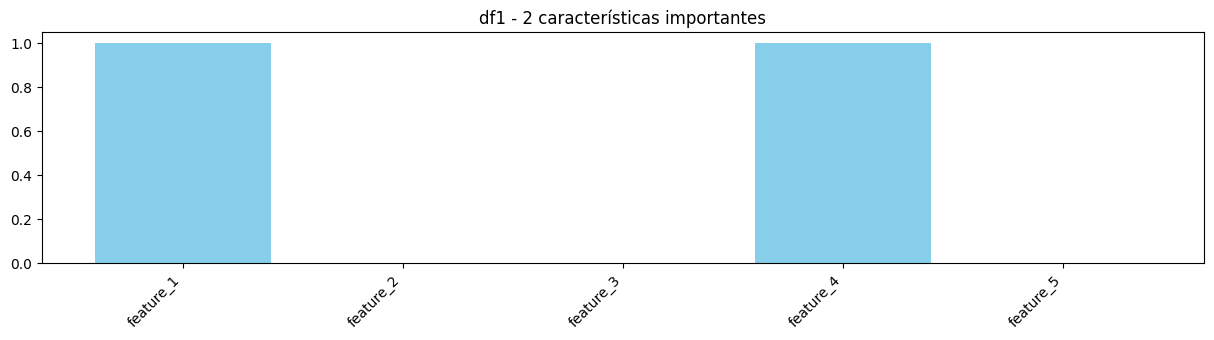

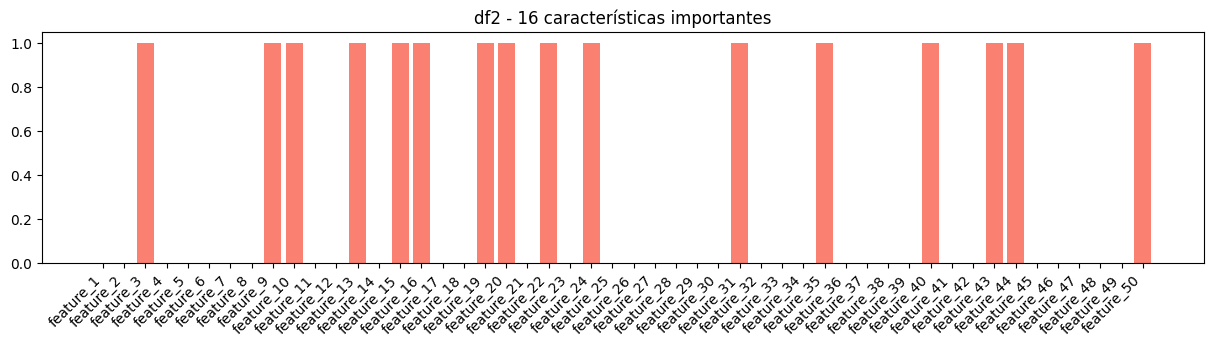

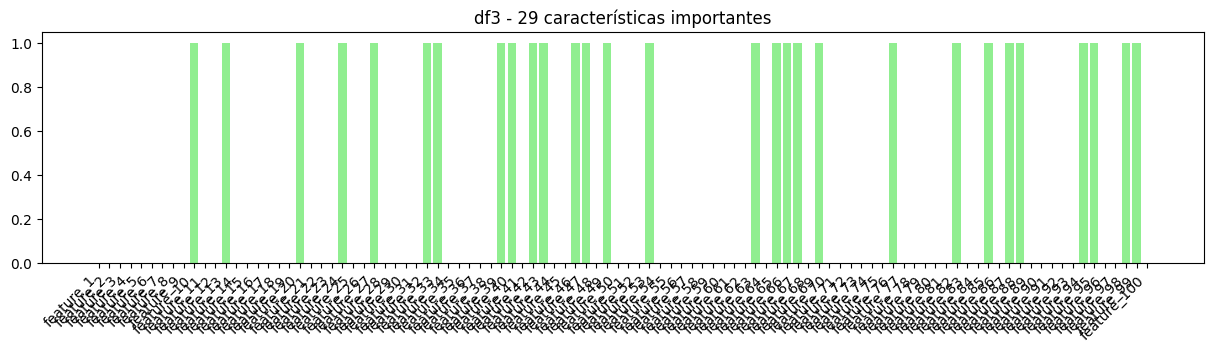

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Função para realizar a seleção de características com base em um modelo
def feature_selection_with_model(df):
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    x = df.drop(columns=['target'])
    y = df['target']
    clf.fit(x, y)
    sfm = SelectFromModel(clf, prefit=True)
    selected_features = sfm.get_support()
    return selected_features

# Seleção de características para cada conjunto de dados
selected_features_df1 = feature_selection_with_model(df1)
selected_features_df2 = feature_selection_with_model(df2)
selected_features_df3 = feature_selection_with_model(df3)

# Contagem do número de características importantes para cada conjunto de dados
num_important_features_df1 = sum(selected_features_df1)
num_important_features_df2 = sum(selected_features_df2)
num_important_features_df3 = sum(selected_features_df3)

print("Número de características importantes para o df1:", num_important_features_df1)
print("Número de características importantes para o df2:", num_important_features_df2)
print("Número de características importantes para o df3:", num_important_features_df3)

# Plotagem das características selecionadas para cada conjunto de dados
plt.figure(figsize=(15, 3))
plt.bar(df1.drop(columns=['target']).columns, selected_features_df1, color='skyblue')
plt.title('df1 - {} características importantes'.format(num_important_features_df1))
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(15, 3))
plt.bar(df2.drop(columns=['target']).columns, selected_features_df2, color='salmon')
plt.title('df2 - {} características importantes'.format(num_important_features_df2))
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(15, 3))
plt.bar(df3.drop(columns=['target']).columns, selected_features_df3, color='lightgreen')
plt.title('df3 - {} características importantes'.format(num_important_features_df3))
plt.xticks(rotation=45, ha='right')
plt.show()


Os resultados do Select From Model para os três conjuntos de dados indicam quais características foram selecionadas como importantes com base no modelo RandomForestClassifier treinado.

**Para o df1:**
2 características foram consideradas importantes.

**Para o df2:**
16 características foram consideradas importantes.

**Para o df3:**
29 características foram consideradas importantes.



# Recursive Feature Elimination
## Documentation: https://scikit-learn.org/stable/modules/feature_selection.html#rfe
## Reference guide: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
## Source: https://github.com/scikit-learn/scikit-learn/blob/872124551/sklearn/feature_selection/_rfe.py#L68

Número de características selecionadas para o df1 (RFE): 4
Número de características selecionadas para o df2 (RFE): 4
Número de características selecionadas para o df3 (RFE): 4


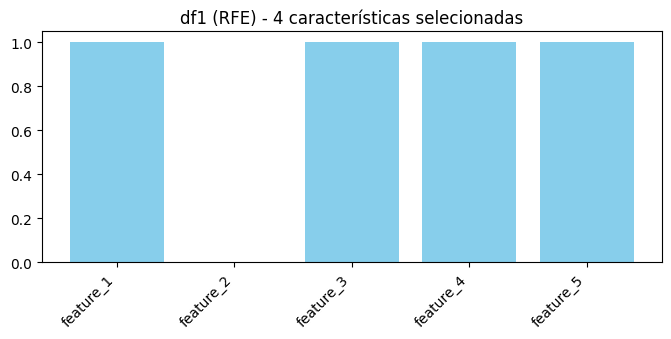

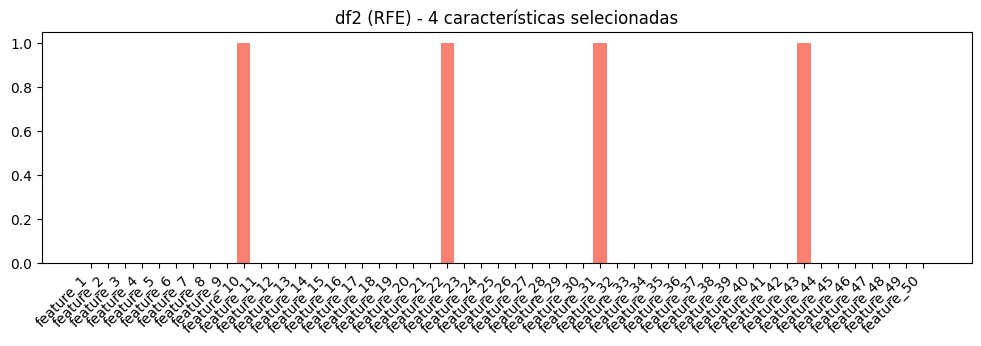

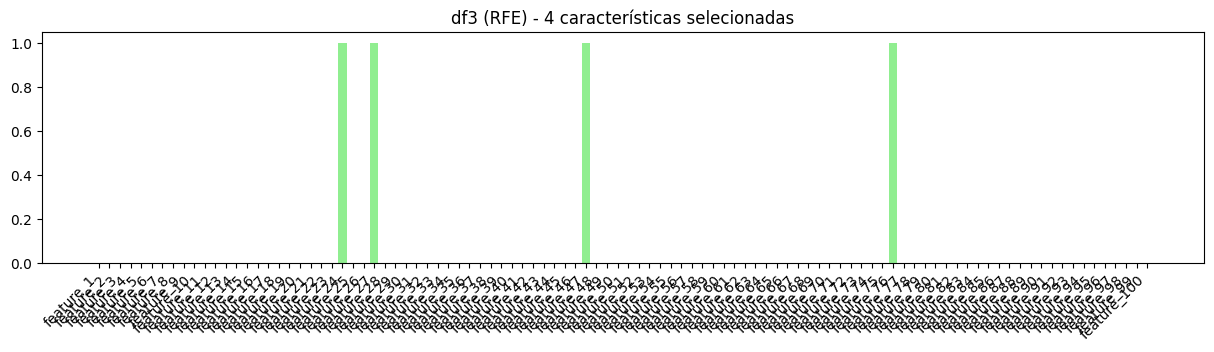

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# Função para realizar a eliminação recursiva de características (RFE)
def recursive_feature_elimination(df):
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    rfe = RFE(estimator=clf, n_features_to_select=4, step=1)
    x = df.drop(columns=['target'])
    y = df['target']
    rfe.fit(x, y)
    selected_features = rfe.support_
    return selected_features

# Eliminação recursiva de características para cada conjunto de dados
selected_features_df1_rfe = recursive_feature_elimination(df1)
selected_features_df2_rfe = recursive_feature_elimination(df2)
selected_features_df3_rfe = recursive_feature_elimination(df3)

# Contagem do número de características selecionadas para cada conjunto de dados
num_selected_features_df1_rfe = sum(selected_features_df1_rfe)
num_selected_features_df2_rfe = sum(selected_features_df2_rfe)
num_selected_features_df3_rfe = sum(selected_features_df3_rfe)

print("Número de características selecionadas para o df1 (RFE):", num_selected_features_df1_rfe)
print("Número de características selecionadas para o df2 (RFE):", num_selected_features_df2_rfe)
print("Número de características selecionadas para o df3 (RFE):", num_selected_features_df3_rfe)

# Plotagem das características selecionadas para o df1 (RFE)
plt.figure(figsize=(8, 3))
plt.bar(df1.drop(columns=['target']).columns, selected_features_df1_rfe, color='skyblue')
plt.title('df1 (RFE) - {} características selecionadas'.format(num_selected_features_df1_rfe))
plt.xticks(rotation=45, ha='right')
plt.show()

# Plotagem das características selecionadas para o df2 (RFE)
plt.figure(figsize=(12, 3))
plt.bar(df2.drop(columns=['target']).columns, selected_features_df2_rfe, color='salmon')
plt.title('df2 (RFE) - {} características selecionadas'.format(num_selected_features_df2_rfe))
plt.xticks(rotation=45, ha='right')
plt.show()

# Plotagem das características selecionadas para o df3 (RFE)
plt.figure(figsize=(15, 3))
plt.bar(df3.drop(columns=['target']).columns, selected_features_df3_rfe, color='lightgreen')
plt.title('df3 (RFE) - {} características selecionadas'.format(num_selected_features_df3_rfe))
plt.xticks(rotation=45, ha='right')
plt.show()


Todos os casos foram selecionadas exatamente 4 características. Isso sugere que, de acordo com o modelo RandomForestClassifier utilizado e os critérios de seleção definidos, esses conjuntos de dados têm um conjunto específico de características que são consideradas as mais importantes para prever o destino.

# Sequential Feature Selection

## documentation: https://scikit-learn.org/stable/modules/feature_selection.html#sequential-feature-selection
## reference guide: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html
## source: https://github.com/scikit-learn/scikit-learn/blob/872124551/sklearn/feature_selection/_sequential.py#L18

Número de características selecionadas para o df1 (SFS): 3
Número de características selecionadas para o df2 (SFS): 3
Número de características selecionadas para o df3 (SFS): 3


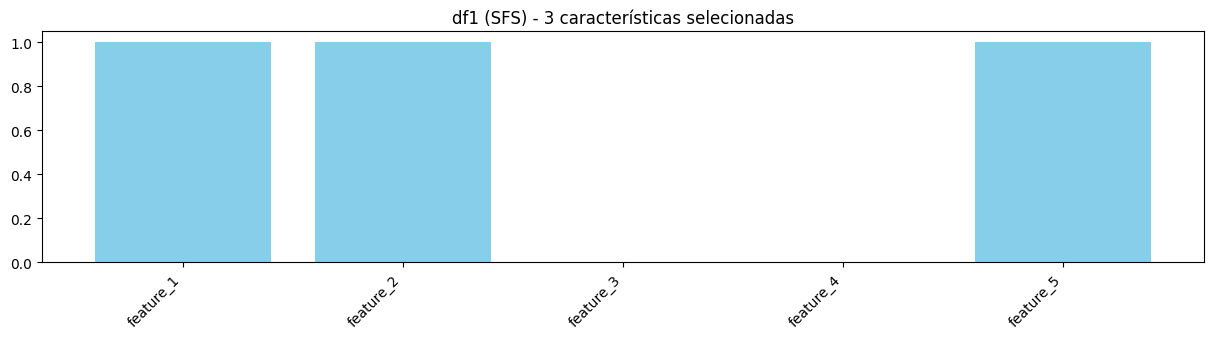

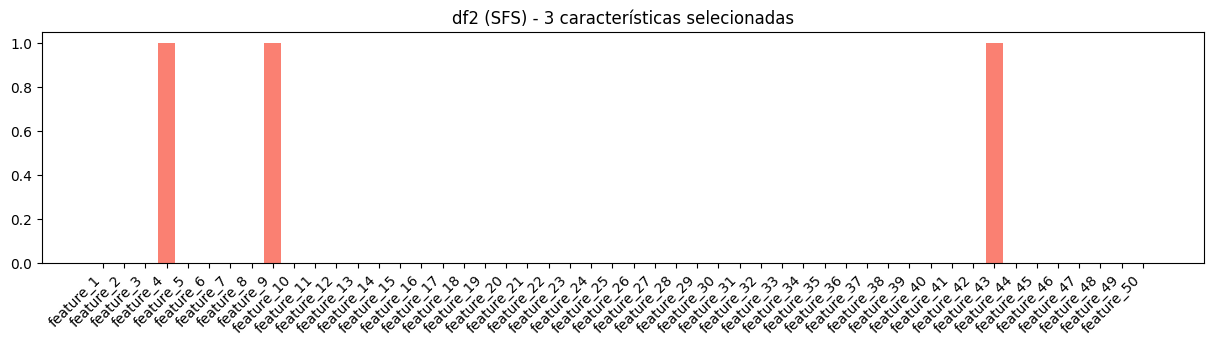

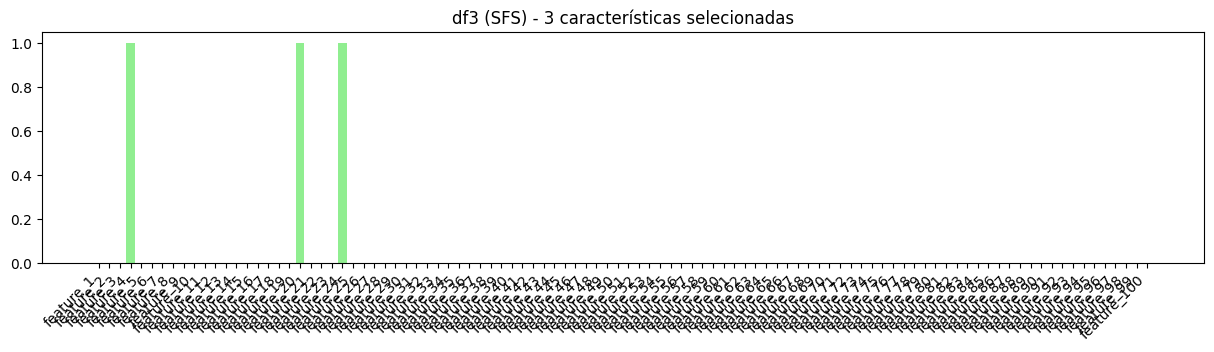

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector as SFS

# Função para realizar a Sequential Feature Selection (SFS)
def sequential_feature_selection(df):
    clf = RandomForestClassifier(n_estimators=100)
    sfs = SFS(clf, n_features_to_select=3)
    x = df.drop(columns=['target'])
    y = df['target']
    sfs = sfs.fit(x, y)
    selected_features = sfs.support_
    return selected_features

# Sequential Feature Selection para cada conjunto de dados
selected_features_df1_sfs = sequential_feature_selection(df1)
selected_features_df2_sfs = sequential_feature_selection(df2)
selected_features_df3_sfs = sequential_feature_selection(df3)

# Contagem do número de características selecionadas para cada conjunto de dados
num_selected_features_df1_sfs = sum(selected_features_df1_sfs)
num_selected_features_df2_sfs = sum(selected_features_df2_sfs)
num_selected_features_df3_sfs = sum(selected_features_df3_sfs)

print("Número de características selecionadas para o df1 (SFS):", num_selected_features_df1_sfs)
print("Número de características selecionadas para o df2 (SFS):", num_selected_features_df2_sfs)
print("Número de características selecionadas para o df3 (SFS):", num_selected_features_df3_sfs)

# Plotagem das características selecionadas para cada conjunto de dados (SFS)
plt.figure(figsize=(15, 3))
plt.bar(df1.drop(columns=['target']).columns, selected_features_df1_sfs, color='skyblue')
plt.title('df1 (SFS) - {} características selecionadas'.format(num_selected_features_df1_sfs))
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(15, 3))
plt.bar(df2.drop(columns=['target']).columns, selected_features_df2_sfs, color='salmon')
plt.title('df2 (SFS) - {} características selecionadas'.format(num_selected_features_df2_sfs))
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(15, 3))
plt.bar(df3.drop(columns=['target']).columns, selected_features_df3_sfs, color='lightgreen')
plt.title('df3 (SFS) - {} características selecionadas'.format(num_selected_features_df3_sfs))
plt.xticks(rotation=45, ha='right')
plt.show()


Isso indica que, de acordo com os critérios de seleção definidos pela Sequential Feature Selector, essas características são consideradas as mais importantes para prever o destino em cada conjunto de dados.

A consistência no número de características selecionadas sugere que essas características possuem uma relevância significativa na classificação dos dados, de acordo com o modelo RandomForestClassifier utilizado.